<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/ship-dataset-ktp?scriptVersionId=123026737" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [33]:
port_calls = pd.read_csv('/kaggle/input/ship-dataset/port_calls_prod_60_8.csv',encoding='iso-8859-1') 

In [34]:
ship_data = pd.read_csv('/kaggle/input/ship-dataset/Ship9794850.csv')

In [35]:
port_calls.head()

,ship_name,imo_number,mmsi,ship_status,ship_type,flag_name,entered,departed,latitude,longitude,speed,port_name,port_country_name,port_code,status,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
0,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2020-12-03T18:41:43Z,NaN,43.563351,7.078405,0.1,Juan-les-Pins,France,FRJLP,Moored,NaN,1143,61.27,3.29,10.98
1,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2020-12-03T14:40:15Z,2020-12-03T18:41:43Z,43.532131,7.123899,13.0,Antibes,France,FRANT,NaN,4.0,1143,61.27,3.29,10.98
2,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-30T08:38:49Z,2020-12-03T14:40:15Z,43.563324,7.078390,0.0,Juan-les-Pins,France,FRJLP,Moored,10326.0,1143,61.27,3.29,10.98
3,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-29T06:59:40Z,2019-09-30T08:38:49Z,43.528362,7.118890,15.0,Antibes,France,FRANT,NaN,25.7,1143,61.27,3.29,10.98
4,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-28T13:42:29Z,2019-09-29T06:59:40Z,43.730396,7.456732,0.1,Monaco,Monaco,MCMON,At anchor,17.3,1143,61.27,3.29,10.98


In [36]:
port_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941496 entries, 0 to 2941495
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ship_name           object 
 1   imo_number          int64  
 2   mmsi                float64
 3   ship_status         object 
 4   ship_type           object 
 5   flag_name           object 
 6   entered             object 
 7   departed            object 
 8   latitude            float64
 9   longitude           float64
 10  speed               float64
 11  port_name           object 
 12  port_country_name   object 
 13  port_code           object 
 14  status              object 
 15  hours_in_port       float64
 16  gross_tonnage       int64  
 17  length_overall_loa  float64
 18  draught             float64
 19  breadth             float64
dtypes: float64(8), int64(2), object(10)
memory usage: 448.8+ MB


In [37]:
port_calls.shape

(2941496, 20)

In [38]:
port_calls.describe().T

,count,mean,std,min,25%,50%,75%,max
imo_number,2941496.0,9.401637e+06,3.828121e+05,1.001984e+06,9.294408e+06,9.407419e+06,9.619452e+06,9.953016e+06
mmsi,2929418.0,4.243636e+08,1.549212e+08,2.050820e+08,2.558064e+08,4.415670e+08,5.634060e+08,7.600021e+08
latitude,2941496.0,2.800831e+01,2.127797e+01,-5.608052e+01,1.293186e+01,3.139425e+01,4.224537e+01,7.899817e+01
longitude,2941496.0,3.549785e+01,7.302316e+01,-1.765236e+02,8.364072e-01,2.889313e+01,1.039524e+02,1.794478e+02
speed,1774365.0,5.257617e+00,5.504000e+00,0.000000e+00,0.000000e+00,3.600000e+00,1.000000e+01,9.840000e+01
hours_in_port,2939354.0,2.885239e+01,1.053171e+02,-7.762800e+03,4.100000e+00,1.100000e+01,2.810000e+01,2.286140e+04
gross_tonnage,2941496.0,3.834638e+04,4.023909e+04,0.000000e+00,9.924000e+03,2.682700e+04,4.954900e+04,2.365830e+05
length_overall_loa,2941496.0,1.972992e+02,7.757210e+01,0.000000e+00,1.410000e+02,1.833100e+02,2.489600e+02,4.000000e+02
draught,2941496.0,1.082371e+01,3.701561e+00,0.000000e+00,8.200000e+00,1.100000e+01,1.350000e+01,2.303500e+01
breadth,2941496.0,2.996526e+01,1.091222e+01,1.980000e+00,2.250000e+01,3.000000e+01,3.280000e+01,1.054000e+02


In [39]:
port_calls.isnull().sum()

ship_name                   0
imo_number                  0
mmsi                    12078
ship_status                 0
ship_type                   0
flag_name                   0
entered                     0
departed                 2142
latitude                    0
longitude                   0
speed                 1167131
port_name                   0
port_country_name           0
port_code                   0
status                1143713
hours_in_port            2142
gross_tonnage               0
length_overall_loa          0
draught                     0
breadth                     0
dtype: int64

We can see there are lots of null values in the dataset which we have remove from it using right imputation methods.

In [40]:
(port_calls.isnull().sum() / port_calls.shape[0]) * 100

ship_name              0.000000
imo_number             0.000000
mmsi                   0.410607
ship_status            0.000000
ship_type              0.000000
flag_name              0.000000
entered                0.000000
departed               0.072820
latitude               0.000000
longitude              0.000000
speed                 39.678143
port_name              0.000000
port_country_name      0.000000
port_code              0.000000
status                38.882018
hours_in_port          0.072820
gross_tonnage          0.000000
length_overall_loa     0.000000
draught                0.000000
breadth                0.000000
dtype: float64

We can embark on two models ,one where we will going to impute the values for the two columns other we will going to remove those columns from the dataset.

In [41]:
port_calls_clean = port_calls.drop(['speed','status'],axis=1)

In [42]:
port_calls_clean.shape

(2941496, 18)

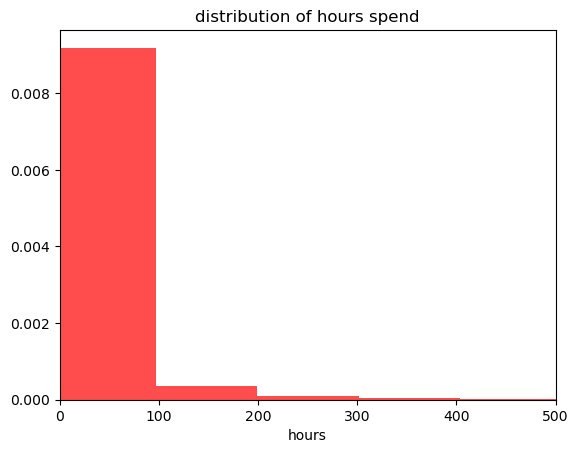

In [43]:
import matplotlib.pyplot as plt

plt.hist(port_calls['hours_in_port'],bins=300,density=True,alpha=0.7,color='red')
plt.xlim(0,500)
plt.xlabel('hours')
plt.title('distribution of hours spend')
plt.show()

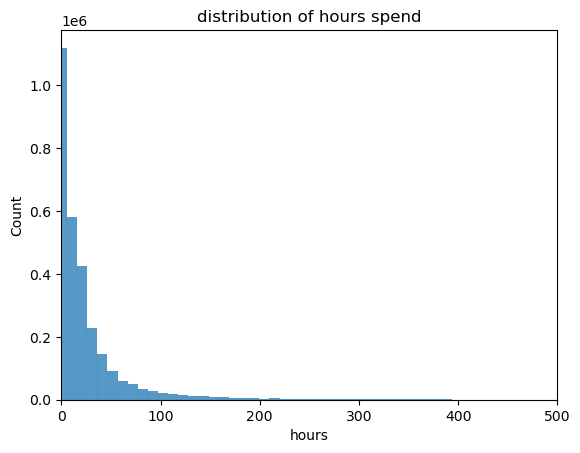

In [44]:
import seaborn as sns

sns.histplot(port_calls['hours_in_port'],bins=3000)
plt.xlim(0,500)
plt.xlabel('hours')
plt.title('distribution of hours spend')
plt.show()


We can say that most of the ship that came, used to spend somewhere close to 0-100 hrs on port. very few ship spend more that 100 hourse as compared with ships who spent less than 100 hrs.

> Starting with the preprocessing of the dataset

In [45]:
modes = port_calls_clean['mmsi'].mode()
print(modes)

0    258092000.0
dtype: float64


In [46]:
port_calls_clean['mmsi'] = port_calls_clean['mmsi'].fillna(modes.iloc[0]) 

In [47]:
modes1 = port_calls_clean['departed'].mode()

In [48]:
port_calls_clean['departed'] = port_calls_clean['departed'].fillna(modes1.iloc[0])

In [49]:
from sklearn.impute import KNNImputer
#this is the column that is needed to impute 
missing_values = ['hours_in_port']
#creating the knn imputer object and fitting it to the data
k = 7 #for larger dataset the higher value of k is required
#starting with the imputation
imputer = KNNImputer(n_neighbors=k)
#fitting it to the dataset
imputed_col = imputer.fit_transform(port_calls_clean[missing_values])
#the output we will be getting in the form of array , we need to convert it in the form of dataframe
imputer_df = pd.DataFrame(imputed_col,columns=missing_values)
#merging this column in the older dataframe
port_calls_clean[missing_values] = imputer_df


In [50]:
port_calls_clean.isnull().sum()

ship_name             0
imo_number            0
mmsi                  0
ship_status           0
ship_type             0
flag_name             0
entered               0
departed              0
latitude              0
longitude             0
port_name             0
port_country_name     0
port_code             0
hours_in_port         0
gross_tonnage         0
length_overall_loa    0
draught               0
breadth               0
dtype: int64

In [51]:
#creating the response and the predictor variable in our dataset
port_calls_clean = port_calls_clean.drop(['entered','departed'],axis=1)


In [52]:
port_calls_clean.head()

,ship_name,imo_number,mmsi,ship_status,ship_type,flag_name,latitude,longitude,port_name,port_country_name,port_code,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
0,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,43.563351,7.078405,Juan-les-Pins,France,FRJLP,28.852388,1143,61.27,3.29,10.98
1,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,43.532131,7.123899,Antibes,France,FRANT,4.000000,1143,61.27,3.29,10.98
2,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,43.563324,7.078390,Juan-les-Pins,France,FRJLP,10326.000000,1143,61.27,3.29,10.98
3,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,43.528362,7.118890,Antibes,France,FRANT,25.700000,1143,61.27,3.29,10.98
4,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,43.730396,7.456732,Monaco,Monaco,MCMON,17.300000,1143,61.27,3.29,10.98


In [53]:
#going on with the label encoding which works best with the larger dataset
categorical_columns = ['ship_name','ship_status','ship_type','flag_name','port_name','port_country_name','port_code']


from sklearn.preprocessing import LabelEncoder
#encoding the categrical columns
le = LabelEncoder()
#fitting it to the dataset
port_calls_clean[categorical_columns] = port_calls_clean[categorical_columns].apply(le.fit_transform)


In [54]:
#finding out the result
port_calls_clean.head()

,ship_name,imo_number,mmsi,ship_status,ship_type,flag_name,latitude,longitude,port_name,port_country_name,port_code,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
0,3064,1001984,319574000.0,4,90,15,43.563351,7.078405,1926,56,1776,28.852388,1143,61.27,3.29,10.98
1,3064,1001984,319574000.0,4,90,15,43.532131,7.123899,173,56,1707,4.000000,1143,61.27,3.29,10.98
2,3064,1001984,319574000.0,4,90,15,43.563324,7.078390,1926,56,1776,10326.000000,1143,61.27,3.29,10.98
3,3064,1001984,319574000.0,4,90,15,43.528362,7.118890,173,56,1707,25.700000,1143,61.27,3.29,10.98
4,3064,1001984,319574000.0,4,90,15,43.730396,7.456732,2754,114,3270,17.300000,1143,61.27,3.29,10.98


In the above dataset we have splitted the dataset without performing the Normalization and the standardization. Here we will going to perform the normalization and also standardization in the dataset.

In [55]:
#creating the class for the min-max scaler 
class MinMaxScaler:
    def __init__(self,feature_range=(0,1)):
        self.feature_range = feature_range
    #it is important to note that the x that is defined here is local to its own class only.
    def fit_tranform(self,X):
        #compute the min and max values of each feature
        self.min_ = X.min()
        self.max_ = X.max()
        self.range_ = (self.max_ - self.min_)
        #scaling the input using the max and min values of the dataset
        x_norm = (X - self.min_) / (self.range_)
        
        #adding the condition based on the feature range that we have provided to it
        if self.feature_range != (0,1):
            x_norm = x_norm * (self.feature_range[1] - self.feature_range[0]) + self.feature_range[0]
            
        return x_norm 
        


In [56]:
import time

# start the timer
start_time = time.perf_counter()
#instantiating the object and assigninig it to the variable
scaler = MinMaxScaler(feature_range=(0,1))

#fitting the scaler to the dataset
scaled = scaler.fit_tranform(port_calls_clean)

# end the timer
end_time = time.perf_counter()

# print the elapsed time
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

#obtaining the scaled dataset
scaled.head()

Elapsed time: 0.4078 seconds


,ship_name,imo_number,mmsi,ship_status,ship_type,flag_name,latitude,longitude,port_name,port_country_name,port_code,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
0,0.416701,0.0,0.206322,0.444444,1.0,0.131579,0.737673,0.515777,0.385508,0.287179,0.347826,0.254428,0.004831,0.153175,0.142826,0.087024
1,0.416701,0.0,0.206322,0.444444,1.0,0.131579,0.737442,0.515905,0.034628,0.287179,0.334313,0.253616,0.004831,0.153175,0.142826,0.087024
2,0.416701,0.0,0.206322,0.444444,1.0,0.131579,0.737673,0.515777,0.385508,0.287179,0.347826,0.590670,0.004831,0.153175,0.142826,0.087024
3,0.416701,0.0,0.206322,0.444444,1.0,0.131579,0.737414,0.515891,0.034628,0.287179,0.334313,0.254325,0.004831,0.153175,0.142826,0.087024
4,0.416701,0.0,0.206322,0.444444,1.0,0.131579,0.738909,0.516840,0.551241,0.584615,0.640423,0.254051,0.004831,0.153175,0.142826,0.087024


In [57]:
X = port_calls_clean.drop(['hours_in_port'],axis=1)
y= port_calls_clean['hours_in_port']

In [58]:
X.shape

(2941496, 15)

In [59]:
y.shape

(2941496,)

In [60]:
from sklearn.model_selection import train_test_split


#obtaining the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2,random_state=42)
#obtaining the validataion dataset
X_train, X_val , y_train , y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

shape  = [X_train, y_train, X_test, y_test,X_val , y_val]

for i in shape:
    print(i.shape)

(1882556, 15)
(1882556,)
(588300, 15)
(588300,)
(470640, 15)
(470640,)


# Starting with the modelling of the dataset

In [61]:
# using the decision tree model 

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# start the timer
start_time = time.perf_counter()

#instanciating the object
dtr = DecisionTreeRegressor()

#fitting the object
dtr.fit(X_train, y_train)

# end the timer
end_time = time.perf_counter()

# print the elapsed time
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

#making a prediction
y_pred = dtr.predict(X_val)

#evaluating the performance of the model on the dataset
mse_dtr = mean_squared_error(y_val, y_pred)

print("mean square error",mse_dtr)

Elapsed time: 37.0105 seconds
mean square error 13717.439537846696


In [ ]:
from sklearn.ensemble import RandomForestRegressor


# start the timer
start_time = time.perf_counter()

#creating the randomforrest model with 100 trees
rf = RandomForestRegressor(n_estimators= 100)

#training the model to the dataset
rf.fit(X_train, y_train)

# end the timer
end_time = time.perf_counter()

# print the elapsed time
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

#making the prediction
y_pred = rf.predict(X_val)

#evaluating the model using the mean squared error
mse_rf = mean_squared_error(y_val,y_pred)

print("mean square error",mse_rf)

In [ ]:
# using the decision tree model 
from sklearn.tree import GradientBoostingRegressor

# start the timer
start_time = time.perf_counter()

#instanciating the object
gbr = GradientBoostingRegressor(n_estimators= 100)

#fitting the object
gbr.fit(X_train, y_train)

# end the timer
end_time = time.perf_counter()

# print the elapsed time
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

#making a prediction
y_pred = gbr.predict(X_val)

#evaluating the performance of the model on the dataset
mse_gbr = mean_squared_error(y_val, y_pred)

print("mean square error",mse_gbr)

In [ ]:
from sklearn.neural_network import MLPRegressor

# start the timer
start_time = time.perf_counter()

#instantiating the object 
NN = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1000)

#training the model on the dataset
NN.fit(X_train,y_train)

# end the timer
end_time = time.perf_counter()

# print the elapsed time
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

#make the prediction 
y_pred = NN.predict(X_val)

#evaluate the model using the mean square error metrics
mse_nn = mean_squared_error(y_val, y_pred)

print("mean square error",mse_nn)



# Dataset 2

In [ ]:
ship_data.head()

In [ ]:
# for i in ship_data.mmsi[i]:
#     if i == port_calls.mmsi[i]:
        
        
# #creating a new dataframe by merging on particular value of the column
# merged_mmsi = pd.merge(port_calls[port_calls['mmsi'].isin([636018764]),ship_data[ship_data['mmsi'].isin([636018764])]],on='mmsi',how='inner')
        

In [ ]:
ship_data.shape

In [ ]:
ship_data.describe().T

In [ ]:
ship_data.isnull().sum()

In [ ]:
#finding the common columns 
common_cols = port_calls.columns.intersection(ship_data.columns)

 > finding out if there are common columns in both the dataset

In [ ]:
print(common_cols)